In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [49]:
chc_pop_df = pd.read_csv('/Users/bricetikum/Desktop/INST447WORK/Chapter11/chicago_population.csv')
chc_pop_df

,name,population,income,latino,black,white,asian,other
0,Rogers Park,54991,39482,0.244,0.263,0.393,0.064,0.036
1,West Ridge,71942,47323,0.204,0.111,0.427,0.225,0.032
2,Uptown,56362,40324,0.142,0.200,0.516,0.114,0.028
3,Lincoln Square,39493,57749,0.191,0.038,0.631,0.111,0.029
4,North Center,31867,81524,0.136,0.023,0.773,0.045,0.022
...,...,...,...,...,...,...,...,...
72,Washington Heights,26493,42053,0.010,0.974,0.005,0.000,0.012
73,Mount Greenwood,19093,80505,0.072,0.052,0.860,0.007,0.010
74,Morgan Park,22544,56886,0.027,0.667,0.287,0.004,0.014
75,O'Hare,12756,49601,0.095,0.032,0.772,0.083,0.019


In [50]:
filter_df = chc_pop_df.drop(columns=['latino', 'black', 'white', 'asian', 'other'])
filter_df

,name,population,income
0,Rogers Park,54991,39482
1,West Ridge,71942,47323
2,Uptown,56362,40324
3,Lincoln Square,39493,57749
4,North Center,31867,81524
...,...,...,...
72,Washington Heights,26493,42053
73,Mount Greenwood,19093,80505
74,Morgan Park,22544,56886
75,O'Hare,12756,49601


In [51]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        77 non-null     object
 1   population  77 non-null     int64 
 2   income      77 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [52]:
chc_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   population  77 non-null     int64  
 2   income      77 non-null     int64  
 3   latino      77 non-null     float64
 4   black       77 non-null     float64
 5   white       77 non-null     float64
 6   asian       77 non-null     float64
 7   other       77 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 4.9+ KB


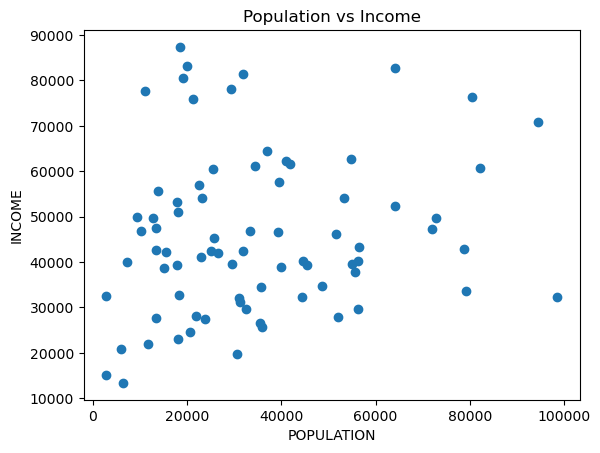

In [53]:
plt.scatter(filter_df['population'], filter_df['income'])
plt.title('Population vs Income')
plt.xlabel('POPULATION')
plt.ylabel('INCOME')
plt.show()

In [54]:
k_rng = range(1,10)
List = []
for k in k_rng:
    cluster = KMeans(n_clusters=k)
    cluster.fit(filter_df[['population', 'income']])
    List.append(cluster.inertia_)

In [55]:
List

[61601545378.46753,
 34878470175.979866,
 22084309533.943287,
 16202092243.44608,
 12737921794.135506,
 10052673113.082754,
 8322301766.958029,
 6451614381.033095,
 5676513529.588797]

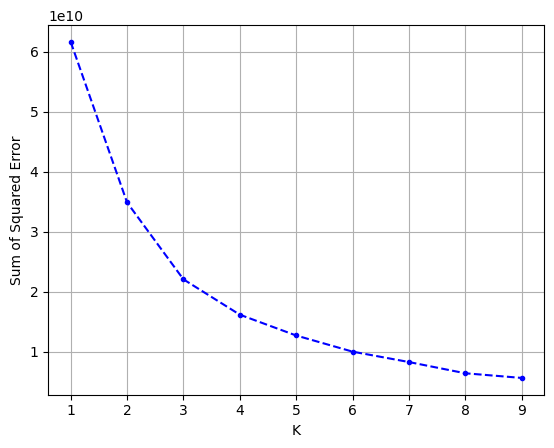

In [56]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.grid()
plt.plot(k_rng, List, linestyle='--', marker='.', color='b')

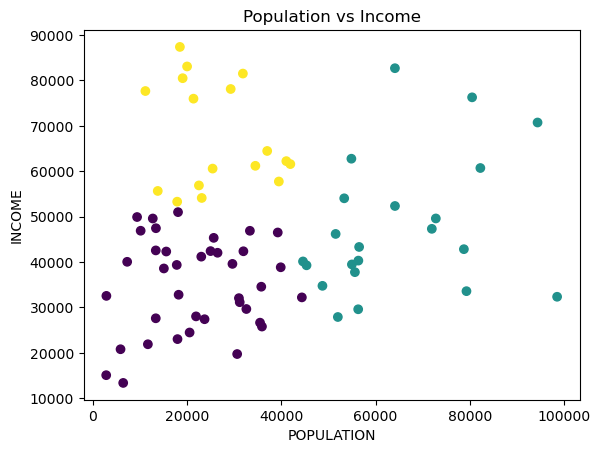

In [57]:
km = KMeans(n_clusters=3)
yp = km.fit(filter_df[['population','income']])
cluster = km.labels_
plt.scatter(filter_df['population'],filter_df['income'],c=cluster)
plt.title('Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()

In [36]:
chc_pop_df2 = chc_pop_df
chc_pop_df2['latino'] = chc_pop_df2['latino'] * chc_pop_df2['population']
chc_pop_df2['black'] = chc_pop_df2['black'] * chc_pop_df2['population']
chc_pop_df2['white'] = chc_pop_df2['white'] * chc_pop_df2['population']
chc_pop_df2['asian'] = chc_pop_df2['asian'] * chc_pop_df2['population']
chc_pop_df2['other'] = chc_pop_df2['other'] * chc_pop_df2['population']
chc_pop_df2

,name,population,income,latino,black,white,asian,other
0,Rogers Park,54991,39482,13417.804,14462.633,21611.463,3519.424,1979.676
1,West Ridge,71942,47323,14676.168,7985.562,30719.234,16186.950,2302.144
2,Uptown,56362,40324,8003.404,11272.400,29082.792,6425.268,1578.136
3,Lincoln Square,39493,57749,7543.163,1500.734,24920.083,4383.723,1145.297
4,North Center,31867,81524,4333.912,732.941,24633.191,1434.015,701.074
...,...,...,...,...,...,...,...,...
72,Washington Heights,26493,42053,264.930,25804.182,132.465,0.000,317.916
73,Mount Greenwood,19093,80505,1374.696,992.836,16419.980,133.651,190.930
74,Morgan Park,22544,56886,608.688,15036.848,6470.128,90.176,315.616
75,O'Hare,12756,49601,1211.820,408.192,9847.632,1058.748,242.364


In [65]:
chc_pop_df2.sort_values('income', ascending = False)

,name,population,income,latino,black,white,asian,other
11,Forest Glen,18508,87394,2128.420,129.556,13806.968,1980.356,444.192
71,Beverly,20034,83092,921.564,6831.594,11779.992,120.204,380.646
6,Lincoln Park,64116,82707,3590.496,2756.988,53152.164,3269.916,1346.436
4,North Center,31867,81524,4333.912,732.941,24633.191,1434.015,701.074
73,Mount Greenwood,19093,80505,1374.696,992.836,16419.980,133.651,190.930
...,...,...,...,...,...,...,...,...
39,Washington Park,11717,21899,105.453,11365.490,82.019,11.717,140.604
35,Oakland,5918,20800,88.770,5568.838,124.278,35.508,106.524
67,Englewood,30654,19743,337.194,29856.996,91.962,30.654,337.194
36,Fuller Park,2876,15086,132.296,2651.672,46.016,5.752,40.264


In [66]:
chc_pop_df2.sort_values('black', ascending = False)

,name,population,income,latino,black,white,asian,other
24,Austin,98514,32358,8767.746,83835.414,4334.616,591.084,985.140
42,South Shore,52010,27903,884.170,49357.490,728.140,104.020,936.180
70,Auburn Gresham,48743,34767,438.687,47670.654,146.229,48.743,438.687
48,Roseland,44619,40142,446.190,43458.906,178.476,44.619,490.809
66,West Englewood,35505,26654,781.110,34191.315,142.020,35.505,390.555
...,...,...,...,...,...,...,...,...
58,McKinley Park,15612,42327,10116.576,234.180,2669.652,2451.084,156.120
9,Norwood Park,37023,64477,4442.760,148.092,30173.745,1703.058,555.345
56,Archer Heights,13393,42571,10178.680,133.930,2879.495,133.930,66.965
11,Forest Glen,18508,87394,2128.420,129.556,13806.968,1980.356,444.192


In [ ]:
chc_pop_df2.sort_values('white', ascending = False)

In [67]:
chc_pop_df2.sort_values('latino', ascending = False)

,name,population,income,latino,black,white,asian,other
29,South Lawndale,79288,33593,65491.888,10386.728,3092.232,79.288,317.152
18,Belmont Cragin,78743,42842,62128.227,2519.776,11968.936,1574.860,629.944
57,Brighton Park,45368,39289,38698.904,544.416,3674.808,2268.400,181.472
21,Logan Square,72791,49610,37268.992,3930.714,28534.072,1819.775,1237.447
62,Gage Park,39894,38855,35585.448,2154.276,1875.018,119.682,119.682
...,...,...,...,...,...,...,...,...
36,Fuller Park,2876,15086,132.296,2651.672,46.016,5.752,40.264
53,Riverdale,6482,13380,129.640,6248.648,32.410,0.000,64.820
39,Washington Park,11717,21899,105.453,11365.490,82.019,11.717,140.604
35,Oakland,5918,20800,88.770,5568.838,124.278,35.508,106.524


In [68]:
chc_pop_df2.sort_values('asian', ascending = False)

,name,population,income,latino,black,white,asian,other
1,West Ridge,71942,47323,14676.168,7985.562,30719.234,16186.950,2302.144
59,Bridgeport,31977,42382,8633.790,671.517,11223.927,11032.065,415.701
33,Armour Square,13391,27619,468.685,1419.446,1647.093,9721.866,147.301
7,Near North Side,80484,76290,3943.716,8692.272,58028.964,8128.884,1609.680
27,Near West Side,54881,62770,5049.052,17287.515,23050.020,8012.626,1481.787
...,...,...,...,...,...,...,...,...
25,West Garfield Park,18001,23033,342.019,17316.962,126.007,0.000,198.011
52,West Pullman,29651,39601,1512.201,27605.081,177.906,0.000,355.812
46,Burnside,2916,32553,20.412,2848.932,20.412,0.000,29.160
72,Washington Heights,26493,42053,264.930,25804.182,132.465,0.000,317.916


In [69]:
chc_pop_df2.sort_values('other', ascending = False)

,name,population,income,latino,black,white,asian,other
1,West Ridge,71942,47323,14676.168,7985.562,30719.234,16186.950,2302.144
5,Lake View,94368,70746,7171.968,3680.352,75871.872,5662.080,1981.728
0,Rogers Park,54991,39482,13417.804,14462.633,21611.463,3519.424,1979.676
23,West Town,82236,60720,23930.676,6414.408,47038.992,3124.968,1809.192
76,Edgewater,56521,43331,9325.965,8082.503,30916.987,6556.436,1639.109
...,...,...,...,...,...,...,...,...
61,West Elsdon,18109,51003,14306.110,253.526,3241.511,217.308,72.436
56,Archer Heights,13393,42571,10178.680,133.930,2879.495,133.930,66.965
53,Riverdale,6482,13380,129.640,6248.648,32.410,0.000,64.820
36,Fuller Park,2876,15086,132.296,2651.672,46.016,5.752,40.264


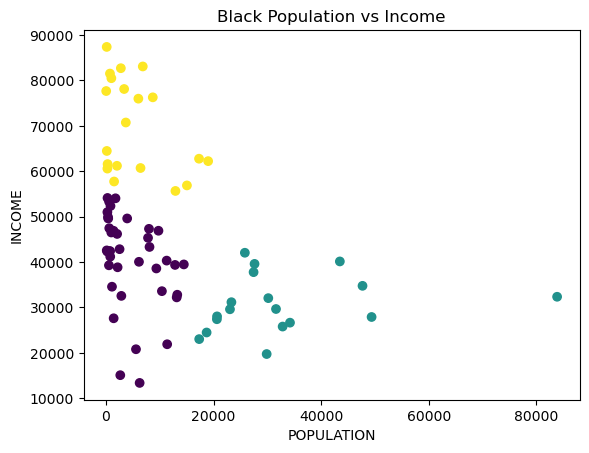

In [60]:
km = KMeans(n_clusters=3)
yp = km.fit(chc_pop_df2[['black', 'income']])
cluster = km.labels_
plt.scatter(chc_pop_df2['black'], chc_pop_df2['income'],c=cluster)
plt.title('Black Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()

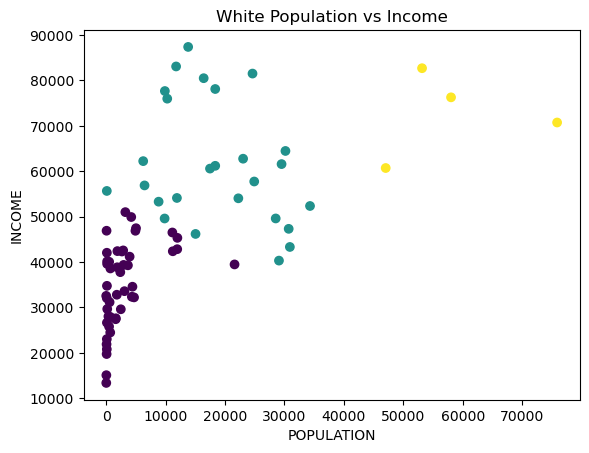

In [61]:
km = KMeans(n_clusters=3)
yp = km.fit(chc_pop_df2[['white', 'income']])
cluster = km.labels_
plt.scatter(chc_pop_df2['white'], chc_pop_df2['income'],c=cluster)
plt.title('White Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()

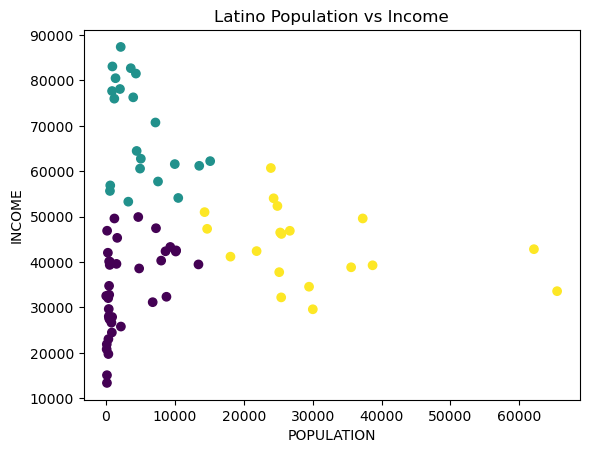

In [62]:
km = KMeans(n_clusters=3)
yp = km.fit(chc_pop_df2[['latino', 'income']])
cluster = km.labels_
plt.scatter(chc_pop_df2['latino'], chc_pop_df2['income'],c=cluster)
plt.title('Latino Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()

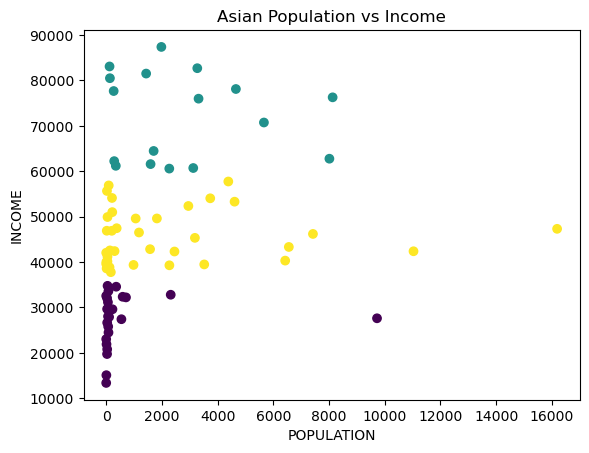

In [63]:
km = KMeans(n_clusters=3)
yp = km.fit(chc_pop_df2[['asian', 'income']])
cluster = km.labels_
plt.scatter(chc_pop_df2['asian'], chc_pop_df2['income'],c=cluster)
plt.title('Asian Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()

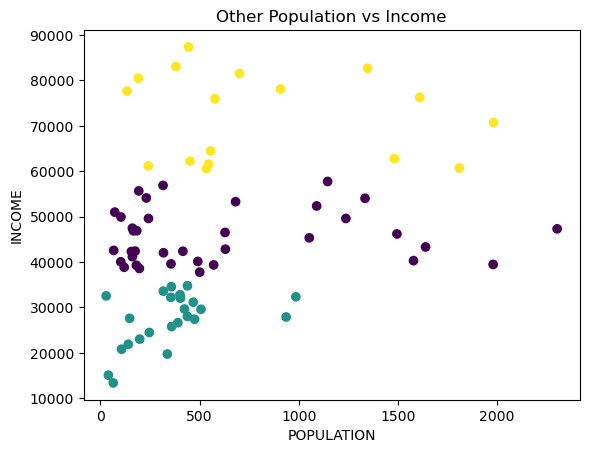

In [64]:
km = KMeans(n_clusters=3)
yp = km.fit(chc_pop_df2[['other', 'income']])
cluster = km.labels_
plt.scatter(chc_pop_df2['other'], chc_pop_df2['income'],c=cluster)
plt.title('Other Population vs Income')
plt.xlabel("POPULATION")
plt.ylabel("INCOME")
plt.show()